In [1]:
#import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#read data
data=pd.read_csv(r"C:\Users\USER\Downloads\car_age_price.csv")

In [5]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Box Plot

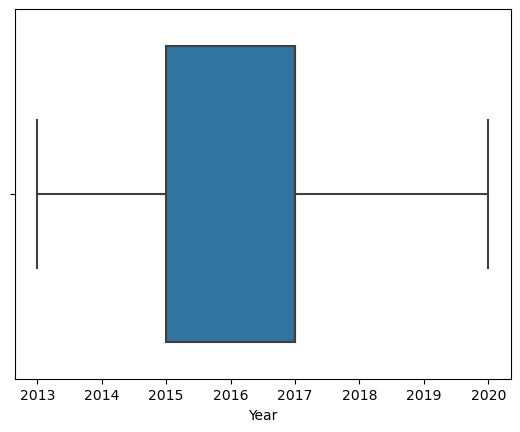

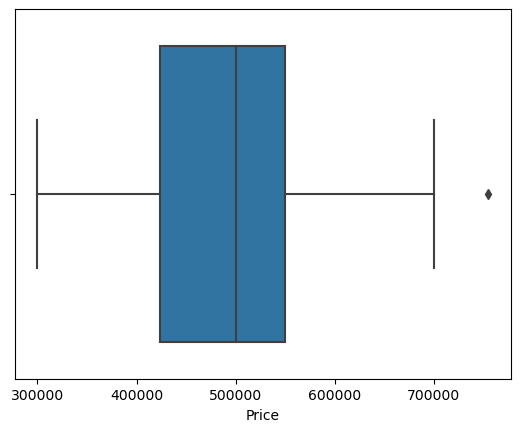

In [9]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

outlier found in Price

# Outlier Removal

In [10]:
IQR=stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [11]:
Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [12]:
data.loc[data.Price<min_limit]

,Year,Price


In [13]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


In [14]:
data.loc[data['Price']>max_limit,'Price']=np.median(data.Price)
data.loc[data.Price>max_limit]

,Year,Price


# Regression Analysis

# linear regression

In [15]:
data.head()

,Year,Price
0,2018,465000
1,2019,500000
2,2019,700000
3,2018,465000
4,2018,465000


In [16]:
corr_matrix=data.corr()

[]

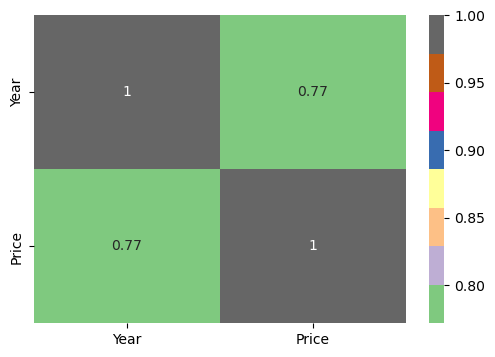

In [17]:
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='Accent')
plt.plot()

In [18]:
#classifying predictor and target
x=data.drop(['Price'],axis=1)
y=data['Price']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [21]:
model1=lr.fit(x_train,y_train)

In [22]:
predictions=model1.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3881491312.3659024
R squared value= 0.4326935668227986


# lasso regression

In [25]:
from sklearn.linear_model import Lasso

In [26]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
lasso=Lasso()
model2=lasso.fit(x_train,y_train)
predictions=model2.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3881454341.953046
R squared value= 0.43269897030083393


# Conclusion

Lasso regression performing better than linear regression as it gives a higher R squared value. Model2 is performing better than model1.

# Predictions

predict the possible price of a 2022 model second-hand grand i10.

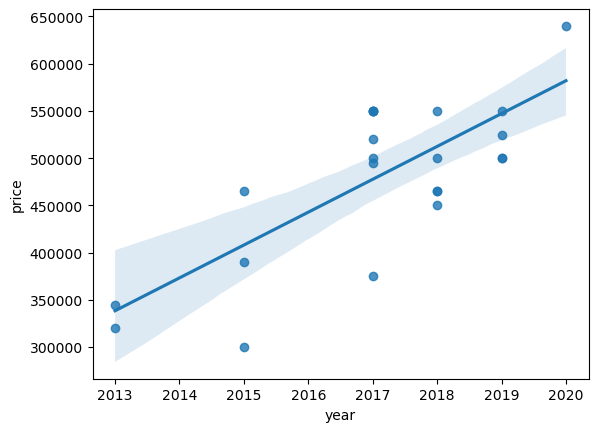

In [31]:
sns.regplot(x=x_test,y=y_test)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

Infrerence:
from the regression graph, we got there is a moderate positive linear relationship between year and price. 

In [31]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [32]:
predictions

array([590888.61480017, 501431.56671524, 546160.0907577 , 546160.0907577 ,
       546160.0907577 , 411974.51863031, 501431.56671524, 546160.0907577 ,
       590888.61480017, 590888.61480017, 322517.47054538, 501431.56671524,
       411974.51863031, 635617.13884263, 546160.0907577 , 590888.61480017,
       322517.47054538, 411974.51863031, 501431.56671524, 501431.56671524,
       501431.56671524, 501431.56671524, 501431.56671524])

In [34]:
print('slope: %.2f'% lasso.coef_[0])

slope: 44728.52


In [37]:
print('intercept:%.2f'%lasso.intercept_)

intercept:-89716001.43


In [42]:
slope=44728.52

In [47]:
intercept=-89716001.43

In [48]:
def myfunc(x):
    return slope*x + intercept

In [49]:
price=myfunc(2022)

In [50]:
print(price)

725066.0099999905
